In [3]:
import numpy as np
import cpnest.model
import corner
import pandas as pd
import matplotlib.pyplot as plt

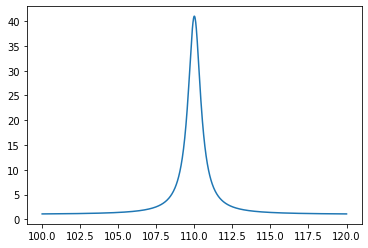

In [36]:
npts = 1000
f = np.linspace(100, 120, npts)
nu = 110.0
height = 10.0
lw = 1.0
lim = height / ((lw/2.0)**2 + (nu - f)**2) + 1.0

plt.plot(f, lim)

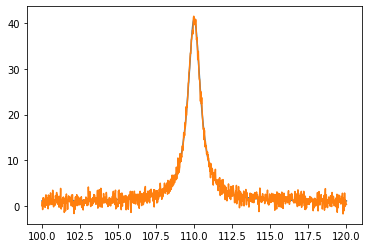

In [37]:
p = lim + np.random.randn(npts)

plt.plot(f, lim)
plt.plot(f, p)

In [38]:
class SimpleModel(cpnest.model.Model):
    """
    A simple Lorentzian model
    """
    names=['nu', 'h', 'lw']
    bounds=[[100,120],[0, 100], [0,10]]
    
    def set_frequency(self, f):
        self.f = f
        
    def set_power(self, p):
        self.p = p
    
    def model(self, param):
        return param['h'] / ((param['lw']/2.0)**2 + (param['nu'] - self.f)**2) + 1.0
    
    def log_likelihood(self, param):
        resid = self.model(param) - self.p
        return np.sum(-0.5*(resid**2) - np.log(2.0*np.pi))

In [39]:
%%time
mymodel = SimpleModel()
mymodel.set_frequency(f)
mymodel.set_power(p)
nest = cpnest.CPNest(mymodel, nlive=1000)
nest.run()

2020-03-17, 11:12:31 - CPNest  : Running with 4 parallel threads
2020-03-17, 11:12:44 - CPNest  : Sampler process 14160: MCMC samples accumulated = 0
2020-03-17, 11:12:44 - CPNest  : Sampler process 14163: MCMC samples accumulated = 0
2020-03-17, 11:12:44 - CPNest  : Sampler process 14161: MCMC samples accumulated = 0
2020-03-17, 11:12:44 - CPNest  : Sampler process 14162: MCMC samples accumulated = 0
2020-03-17, 11:12:44 - CPNest  : Sampler process 14163 - mean acceptance 0.547: exiting
2020-03-17, 11:12:44 - CPNest  : Sampler process 14161 - mean acceptance 0.545: exiting
2020-03-17, 11:12:44 - CPNest  : Sampler process 14160 - mean acceptance 0.556: exiting
2020-03-17, 11:12:44 - CPNest  : Sampler process 14162 - mean acceptance 0.538: exiting
2020-03-17, 11:12:44 - CPNest  : Final evidence: -2348.67
2020-03-17, 11:12:44 - CPNest  : Information: 19.83
2020-03-17, 11:12:47 - CPNest  : Computed log_evidences: (-2348.682399358652,)
2020-03-17, 11:12:47 - CPNest  : Relative weights of i

CPU times: user 6.03 s, sys: 388 ms, total: 6.42 s
Wall time: 15.5 s


In [40]:
import pandas as pd
df = pd.DataFrame(nest.get_posterior_samples())
df.head()

2020-03-17, 11:12:49 - CPNest  : Computed log_evidences: (-2348.682399358652,)
2020-03-17, 11:12:49 - CPNest  : Relative weights of input files: [1.0]
2020-03-17, 11:12:49 - CPNest  : Relative weights of input files taking into account their length: [1.0]
2020-03-17, 11:12:49 - CPNest  : Number of input samples: [24676]
2020-03-17, 11:12:49 - CPNest  : Expected number of samples from each input file [3291]
2020-03-17, 11:12:49 - CPNest  : Samples produced: 3291


,nu,h,lw,logL,logPrior
0,110.007259,9.587054,0.972907,-2338.405201,0.0
1,109.995876,10.365365,1.030531,-2335.084356,0.0
2,110.009337,9.873651,0.999636,-2335.077428,0.0
3,110.003113,9.676754,0.988517,-2334.738960,0.0
4,109.997283,9.964508,1.009112,-2334.473849,0.0


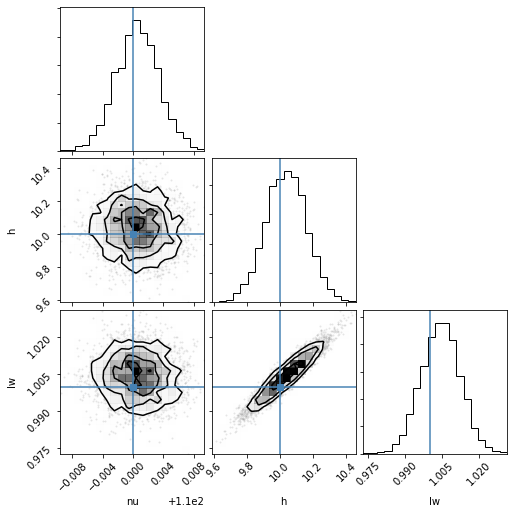

In [41]:
import corner 
corner.corner(df[['nu', 'h', 'lw']], truths=[nu, height, lw]);